In [ ]:
import gradio as gr
import numpy as np
import torch
import matplotlib.pyplot as plt
from PIL import Image
from diffusers import StableDiffusionInpaintPipeline

# Check if GPU is available
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load Stable Diffusion Inpainting Model
pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-inpainting"
).to(device)

print("✅ Model Loaded Successfully!")

# Function to apply inpainting
def modify_nose(input_image, nose_style):
    input_image = input_image.resize((512, 512))

    # Create an empty mask
    mask = np.zeros((512, 512), dtype=np.uint8)

    # Define nose position (Adjust as needed)
    nose_x, nose_y, nose_width, nose_height = 170, 115, 50, 60
    mask[nose_y:nose_y+nose_height, nose_x:nose_x+nose_width] = 255

    # Convert mask to PIL Image
    mask_image = Image.fromarray(mask).convert("L")

    # Define style-specific prompts
    prompts = {
        "Small": "A woman with a small delicate nose, side profile.",
        "Sharp": "A woman with a sharp pointed nose, side profile.",
        "Round": "A woman with a round nose, side profile.",
        "Wide": "A woman with a wide broad nose, side profile.",
        "Natural": "A woman with a natural nose, side profile."
    }

    prompt = prompts[nose_style]

    # Apply inpainting
    edited_image = pipe(
        prompt=prompt,
        negative_prompt="blurry, distorted, extra artifacts, unnatural",
        image=input_image,
        mask_image=mask_image,
        guidance_scale=12.0
    ).images[0]

    return edited_image

# Gradio Interface
iface = gr.Interface(
    fn=modify_nose,
    inputs=[
        gr.Image(type="pil", label="Upload Side-View Image"),
        gr.Radio(["Small", "Sharp", "Round", "Wide", "Natural"], label="Select Nose Style")
    ],
    outputs=gr.Image(label="Modified Image"),
    title="Rhinoplasty AI",
    description="Upload a side-view face image and modify the nose shape using AI-powered inpainting."
)

# Launch the app in Colab
iface.launch(share=True)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/544 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/638 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/914 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

✅ Model Loaded Successfully!
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://82f34f6b6fbcdb4a4c.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [15]:
import gradio as gr
import numpy as np
import torch
import matplotlib.pyplot as plt
from PIL import Image
from diffusers import StableDiffusionInpaintPipeline

# Check if GPU is available
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load Stable Diffusion Inpainting Model
pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-inpainting"
).to(device)

print("✅ Model Loaded Successfully!")

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

✅ Model Loaded Successfully!


In [ ]:
# Function to apply inpainting
def modify_nose_front(input_image, nose_style):
    input_image = input_image.resize((512, 512))

    # Create an empty mask
    mask = np.zeros((512, 512), dtype=np.uint8)

    # Adjust these values for front-view nose position
    nose_x, nose_y, nose_width, nose_height = 230, 200, 70, 90
    mask[nose_y:nose_y+nose_height, nose_x:nose_x+nose_width] = 255

    # Convert mask to PIL Image
    mask_image = Image.fromarray(mask).convert("L")

    # Define front-view style-specific prompts
    prompts = {
        "Small": "A person with a small and delicate nose, front view, photorealistic, studio lighting.",
        "Sharp": "A person with a sharp and pointed nose, front view, realistic facial features.",
        "Round": "A person with a round nose, front view, realistic photo.",
        "Wide": "A person with a wide nose, front view, natural expression.",
        "Natural": "A person with a naturally shaped nose, front view, high-resolution portrait."
    }

    prompt = prompts[nose_style]

    # Apply inpainting
    edited_image = pipe(
        prompt=prompt,
        negative_prompt="blurry, distorted, extra artifacts, unnatural face",
        image=input_image,
        mask_image=mask_image,
        guidance_scale=12.0
    ).images[0]

    return edited_image

# Gradio Interface
iface = gr.Interface(
    fn=modify_nose_front,
    inputs=[
        gr.Image(type="pil", label="Upload Front-View Image"),
        gr.Radio(["Small", "Sharp", "Round", "Wide", "Natural"], label="Select Nose Style")
    ],
    outputs=gr.Image(label="Modified Image"),
    title="Rhinoplasty AI - Front View",
    description="Upload a front-view face image and modify the nose shape using AI-powered inpainting."
)

# Launch the app in Colab
iface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://12961cc4ec01ec8c8c.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
# Updated function to apply inpainting with better control
#This block code is for adjsting the position of the nose manually in the above code
def modify_nose_front(input_image, nose_style):
    input_image = input_image.resize((512, 512))

    # Create an empty mask (highlighting nose area only)
    mask = np.zeros((512, 512), dtype=np.uint8)
    nose_x, nose_y, nose_width, nose_height = 235, 210, 60, 75
    mask[nose_y:nose_y+nose_height, nose_x:nose_x+nose_width] = 255
    mask_image = Image.fromarray(mask).convert("L")

    # Style-specific prompts with stronger conditioning
    prompts = {
        "Small": "Front view portrait of a person with a small, delicate nose. Symmetrical, natural skin, high detail, photorealistic.",
        "Sharp": "Front view portrait of a person with a sharp, well-defined nose bridge and narrow nostrils. Realistic, high-definition facial features.",
        "Round": "Front view portrait of a person with a round, bulbous nose. Smooth skin, natural expression, studio lighting.",
        "Wide": "Front view portrait of a person with a wide, flat nose and broad nostrils. Ethnic diversity, clear focus, realistic lighting.",
        "Natural": "Front view portrait of a person with a naturally shaped nose. No exaggeration, authentic facial features, photorealism."
    }

    prompt = prompts[nose_style]

    # Apply inpainting with improved settings
    edited = pipe(
        prompt=prompt,
        negative_prompt="blurry, distorted, deformed face, extra limbs, low quality, artifact",
        image=input_image,
        mask_image=mask_image,
        num_inference_steps=75,         # more steps = better detail
        guidance_scale=7.5              # slightly lower = more natural edits
    ).images[0]

    return edited



    # Gradio Interface
iface = gr.Interface(
    fn=modify_nose_front,
    inputs=[
        gr.Image(type="pil", label="Upload Front-View Image"),
        gr.Radio(["Small", "Sharp", "Round", "Wide", "Natural"], label="Select Nose Style")
    ],
    outputs=gr.Image(label="Modified Image"),
    title="Rhinoplasty AI - Front View",
    description="Upload a front-view face image and modify the nose shape using AI-powered inpainting."
)

# Launch the app in Colab
iface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://8a8fcfe96d296efda5.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Nose tip position: (68, 90)
Nose tip position: (216, 92)


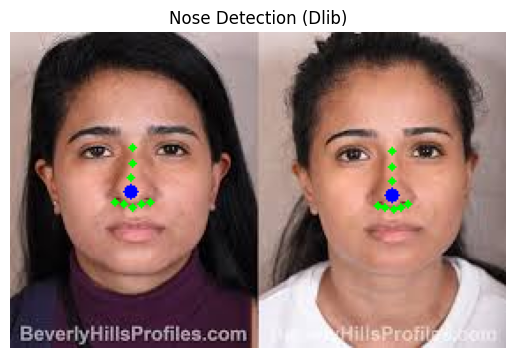

In [4]:
import cv2
import dlib
import matplotlib.pyplot as plt

# Load pre-trained face detector and shape predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/content/drive/My Drive/shape_predictor_68_face_landmarks.dat")

# Load image
img = cv2.imread("/content/front view image nose.jpeg")  # Replace with actual image path
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = detector(gray)

for face in faces:
    landmarks = predictor(gray, face)

    # Nose landmarks: points 27–35
    nose_points = []
    for i in range(27, 36):
        x = landmarks.part(i).x
        y = landmarks.part(i).y
        nose_points.append((x, y))
        cv2.circle(img, (x, y), 2, (0, 255, 0), -1)

    # Optionally: draw center of the nose tip (point 30)
    nose_tip = (landmarks.part(30).x, landmarks.part(30).y)
    print(f"Nose tip position: {nose_tip}")
    cv2.circle(img, nose_tip, 4, (255, 0, 0), -1)

# Convert to RGB and display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.title("Nose Detection (Dlib)")
plt.show()

Nose bounding box: x=59, y=65, width=20, height=34
Nose bounding box: x=208, y=67, width=17, height=33


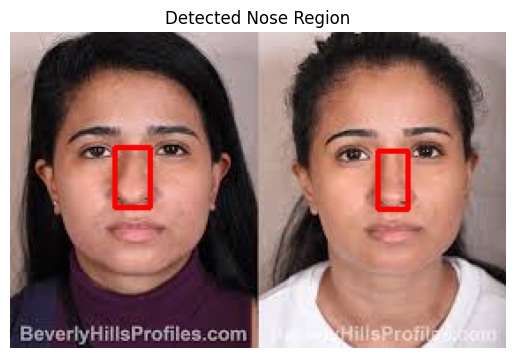

In [5]:
import cv2
import dlib
import matplotlib.pyplot as plt

# Load face detector and predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/content/drive/My Drive/shape_predictor_68_face_landmarks.dat")

# Load and process image
img = cv2.imread("/content/front view image nose.jpeg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = detector(gray)

for face in faces:
    landmarks = predictor(gray, face)

    # Get nose landmarks (points 27 to 35)
    nose_points = [(landmarks.part(i).x, landmarks.part(i).y) for i in range(27, 36)]

    # Get bounding box around nose
    x_coords = [pt[0] for pt in nose_points]
    y_coords = [pt[1] for pt in nose_points]
    nose_x, nose_y = min(x_coords), min(y_coords)
    nose_width = max(x_coords) - nose_x
    nose_height = max(y_coords) - nose_y

    print(f"Nose bounding box: x={nose_x}, y={nose_y}, width={nose_width}, height={nose_height}")

    # Draw bounding box on the image
    cv2.rectangle(img, (nose_x, nose_y), (nose_x + nose_width, nose_y + nose_height), (0, 0, 255), 2)

# Show the result
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.title("Detected Nose Region")
plt.show()

In [16]:
import numpy as np
import dlib
import cv2
from PIL import Image
import gradio as gr

# Load face detector and facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/content/drive/My Drive/shape_predictor_68_face_landmarks.dat")

# Your inpainting pipeline (make sure it's defined or loaded earlier in your code)
# Example: pipe = StableDiffusionInpaintPipeline.from_pretrained(...)

def modify_nose_front(input_image, nose_style):
    # Resize image for consistency
    input_image = input_image.resize((512, 512))
    img_array = np.array(input_image)
    img_bgr = cv2.cvtColor(img_array, cv2.COLOR_RGB2BGR)
    gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = detector(gray)
    if len(faces) == 0:
        raise ValueError("No face detected.")

    # Assume first face
    landmarks = predictor(gray, faces[0])

    # Nose landmark points (index 27 to 35)
    nose_points = [(landmarks.part(i).x, landmarks.part(i).y) for i in range(27, 36)]
    x_coords = [pt[0] for pt in nose_points]
    y_coords = [pt[1] for pt in nose_points]
    nose_x = min(x_coords)
    nose_y = min(y_coords)
    nose_width = max(x_coords) - nose_x
    nose_height = max(y_coords) - nose_y

    # Create mask from detected nose bounding box
    mask = np.zeros((512, 512), dtype=np.uint8)
    mask[nose_y:nose_y+nose_height, nose_x:nose_x+nose_width] = 255
    mask_image = Image.fromarray(mask).convert("L")

    # Style prompts
    prompts = {
        "Small": "Front view portrait of a person with a small, delicate nose. Symmetrical, natural skin, high detail, photorealistic.",
        "Sharp": "Front view portrait of a person with a sharp, well-defined nose bridge and narrow nostrils. Realistic, high-definition facial features.",
        "Round": "Front view portrait of a person with a round, bulbous nose. Smooth skin, natural expression, studio lighting.",
        "Wide": "Front view portrait of a person with a wide, flat nose and broad nostrils. Ethnic diversity, clear focus, realistic lighting.",
        "Natural": "Front view portrait of a person with a naturally shaped nose. No exaggeration, authentic facial features, photorealism."
    }

    prompt = prompts[nose_style]

    # Inpainting using diffusion pipeline
    edited = pipe(
        prompt=prompt,
        negative_prompt="blurry, distorted, deformed face, extra limbs, low quality, artifact",
        image=input_image,
        mask_image=mask_image,
        num_inference_steps=75,
        guidance_scale=7.5
    ).images[0]

    return edited

# Gradio interface
iface = gr.Interface(
    fn=modify_nose_front,
    inputs=[
        gr.Image(type="pil", label="Upload Front-View Image"),
        gr.Radio(["Small", "Sharp", "Round", "Wide", "Natural"], label="Select Nose Style")
    ],
    outputs=gr.Image(label="Modified Image"),
    title="Rhinoplasty AI - Front View",
    description="Upload a front-view face image and modify the nose shape using AI-powered inpainting with automatic nose detection."
)

# Launch in Colab or locally
iface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://3185272d3687eb029c.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
